In [18]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:

# reading the data and looking at the first five rows of the data
fuel_receipts_costs=pd.read_csv("/content/fuel_receipts_costs_eia923 (1).csv")
fuel_receipts_costs.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,rowid,plant_id_eia,plant_id_eia_label,report_date,contract_type_code,contract_type_code_label,contract_expiration_date,energy_source_code,energy_source_code_label,fuel_type_code_pudl,...,primary_transportation_mode_code,primary_transportation_mode_code_label,secondary_transportation_mode_code,secondary_transportation_mode_code_label,natural_gas_transport_code,natural_gas_delivery_contract_type_code,moisture_content_pct,chlorine_content_ppm,data_maturity,data_maturity_label
0,1,3,Barry,2008-01-01,C,C,2008-04-01,BIT,BIT,coal,...,RV,RV,NaN,NaN,firm,NaN,NaN,NaN,final,final
1,2,3,Barry,2008-01-01,C,C,2008-04-01,BIT,BIT,coal,...,RV,RV,NaN,NaN,firm,NaN,NaN,NaN,final,final
2,3,3,Barry,2008-01-01,C,C,NaN,NG,NG,gas,...,PL,PL,NaN,NaN,firm,NaN,NaN,NaN,final,final
3,4,7,Gadsden,2008-01-01,C,C,2015-12-01,BIT,BIT,coal,...,TR,TR,NaN,NaN,firm,NaN,NaN,NaN,final,final
4,5,7,Gadsden,2008-01-01,S,S,2008-11-01,BIT,BIT,coal,...,TR,TR,NaN,NaN,firm,NaN,NaN,NaN,final,final


In [20]:
# statistics of the data
fuel_receipts_costs.describe()

,rowid,plant_id_eia,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
count,608565.000000,608565.000000,216618.000000,216618.000000,6.085650e+05,608565.000000,608565.000000,608565.000000,319083.000000,408325.000000,91976.000000,91976.000000
mean,304283.000000,18290.326018,1577.157125,1577.157125,2.429669e+05,8.839037,0.514479,3.606441,0.008049,14.184272,15.568167,59.193235
std,175677.727622,22756.075538,1530.122347,1530.122347,7.257467e+05,9.898653,0.997845,6.613402,0.045078,1257.500739,10.787936,255.261018
min,1.000000,3.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,-71.930000,0.000000,0.000000
25%,152142.000000,2712.000000,42.000000,42.000000,3.700000e+03,1.025000,0.000000,0.000000,0.000000,2.277000,6.600000,0.000000
50%,304283.000000,6155.000000,972.000000,972.000000,2.156500e+04,1.061000,0.000000,0.000000,0.000000,3.276000,11.940000,0.000000
75%,456424.000000,50707.000000,3121.000000,3121.000000,1.061640e+05,17.809000,0.490000,5.800000,0.000000,4.821000,26.760000,0.000000
max,608565.000000,64020.000000,4562.000000,4562.000000,4.815976e+07,1049.000000,11.010000,72.200000,1.820000,562572.160000,247.000000,3747.000000


In [21]:
fuel_receipts_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608565 entries, 0 to 608564
Data columns (total 30 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   rowid                                     608565 non-null  int64  
 1   plant_id_eia                              608565 non-null  int64  
 2   plant_id_eia_label                        597400 non-null  object 
 3   report_date                               608565 non-null  object 
 4   contract_type_code                        608327 non-null  object 
 5   contract_type_code_label                  608327 non-null  object 
 6   contract_expiration_date                  264263 non-null  object 
 7   energy_source_code                        608564 non-null  object 
 8   energy_source_code_label                  608564 non-null  object 
 9   fuel_type_code_pudl                       608564 non-null  object 
 10  fuel_group_code     

In [22]:
fuel_receipts_costs.drop(['rowid','plant_id_eia_label','report_date','contract_expiration_date','energy_source_code',
                          'energy_source_code_label','fuel_type_code_pudl','mine_id_pudl_label','primary_transportation_mode_code',
                          'supplier_name','secondary_transportation_mode_code','natural_gas_delivery_contract_type_code',
'data_maturity_label','contract_type_code_label','primary_transportation_mode_code_label','secondary_transportation_mode_code_label','data_maturity','natural_gas_transport_code']


, axis=1, inplace=True)

In [23]:
fuel_receipts_costs.head()

,plant_id_eia,contract_type_code,fuel_group_code,mine_id_pudl,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
0,3,C,coal,0.0,259412.0,23.100,0.49,5.4,NaN,2.135,NaN,NaN
1,3,C,coal,0.0,52241.0,22.800,0.48,5.7,NaN,2.115,NaN,NaN
2,3,C,natural_gas,NaN,2783619.0,1.039,0.00,0.0,NaN,8.631,NaN,NaN
3,7,C,coal,1.0,25397.0,24.610,1.69,14.7,NaN,2.776,NaN,NaN
4,7,S,coal,2.0,764.0,24.446,0.84,15.5,NaN,3.381,NaN,NaN


In [24]:
fuel_receipts_costs.dropna(subset=['plant_id_eia','contract_type_code','fuel_group_code','mine_id_pudl','fuel_received_units',
                                  
                                  'fuel_mmbtu_per_unit','sulfur_content_pct','ash_content_pct','mercury_content_ppm','fuel_cost_per_mmbtu',
                                   
                                  'moisture_content_pct','chlorine_content_ppm'
                                  ], inplace=True)

In [25]:
fuel_receipts_costs

,plant_id_eia,contract_type_code,fuel_group_code,mine_id_pudl,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
315779,3,C,coal,1038.0,167498.0,21.284,0.55,7.60,0.000,3.978,0.00,0.0
315780,3,C,coal,1038.0,37259.0,22.634,0.36,7.70,0.000,1.849,0.00,0.0
315783,7,C,coal,3106.0,8157.0,25.177,1.81,13.20,0.000,3.678,3.91,0.0
315786,8,C,coal,1038.0,43585.0,21.284,0.55,7.60,0.000,4.345,0.00,0.0
315787,8,C,coal,4019.0,77250.0,23.948,1.33,12.60,0.000,3.997,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608335,56564,S,coal,20.0,78353.0,18.090,0.22,4.57,0.000,2.290,26.56,0.0
608343,56596,C,coal,660.0,47191.0,16.160,0.35,5.30,0.093,0.814,31.65,0.0
608344,56609,C,coal,605.0,200719.0,16.100,0.28,4.70,0.000,0.891,32.29,0.0
608372,56786,C,coal,633.0,24744.0,12.400,0.63,11.30,0.108,2.695,37.25,0.0


In [26]:
#Converting categorical variables with theitr  levels 
fuel_receipts_costs['contract_type_code'] = fuel_receipts_costs['contract_type_code'].map({'C': 1,'NC': 2,'S': 3, 'T': 4})
fuel_receipts_costs['fuel_group_code'] = fuel_receipts_costs['fuel_group_code'].map({'coal': 1,'natural_gas': 2,'other_gas': 3, 'petroleum': 4,'petroleum_coke':5})

In [27]:
fuel_receipts_costs

,plant_id_eia,contract_type_code,fuel_group_code,mine_id_pudl,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
315779,3,1,1,1038.0,167498.0,21.284,0.55,7.60,0.000,3.978,0.00,0.0
315780,3,1,1,1038.0,37259.0,22.634,0.36,7.70,0.000,1.849,0.00,0.0
315783,7,1,1,3106.0,8157.0,25.177,1.81,13.20,0.000,3.678,3.91,0.0
315786,8,1,1,1038.0,43585.0,21.284,0.55,7.60,0.000,4.345,0.00,0.0
315787,8,1,1,4019.0,77250.0,23.948,1.33,12.60,0.000,3.997,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608335,56564,3,1,20.0,78353.0,18.090,0.22,4.57,0.000,2.290,26.56,0.0
608343,56596,1,1,660.0,47191.0,16.160,0.35,5.30,0.093,0.814,31.65,0.0
608344,56609,1,1,605.0,200719.0,16.100,0.28,4.70,0.000,0.891,32.29,0.0
608372,56786,1,1,633.0,24744.0,12.400,0.63,11.30,0.108,2.695,37.25,0.0


In [28]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(fuel_receipts_costs)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,6.506500e+04,6.506500e+04,65065.0,6.506500e+04,6.506500e+04,6.506500e+04,6.506500e+04,6.506500e+04,6.506500e+04,6.506500e+04,6.506500e+04,6.506500e+04
mean,-3.494562e-17,-1.380352e-16,0.0,1.747281e-17,-3.669290e-17,-2.638394e-16,-1.856486e-18,3.494562e-17,3.712972e-17,-3.424671e-16,1.118260e-16,5.241843e-18
std,1.000008e+00,1.000008e+00,0.0,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-6.515895e-01,-5.276258e-01,0.0,-8.090397e-01,-7.273166e-01,-3.741093e+00,-1.032426e+00,-2.071528e+00,-4.118122e-01,-2.570841e+00,-1.610949e+00,-1.848188e-01
25%,-4.317436e-01,-5.276258e-01,0.0,-7.984135e-01,-5.470213e-01,-8.857968e-01,-8.177980e-01,-7.667030e-01,-4.118122e-01,-5.265042e-01,-9.264335e-01,-1.848188e-01
50%,-1.424115e-01,-5.276258e-01,0.0,-7.027779e-01,-3.334425e-01,2.333963e-01,-4.628366e-01,-8.819369e-02,-4.118122e-01,-1.313037e-01,-3.107517e-01,-1.848188e-01
75%,1.458855e-01,-5.276258e-01,0.0,8.967747e-01,1.215358e-01,9.032994e-01,1.047813e+00,3.815435e-01,-4.118122e-01,3.914542e-01,9.760614e-01,-1.848188e-01
max,6.698819e+00,1.921803e+00,0.0,2.039402e+00,1.182857e+01,2.606570e+00,6.256665e+00,1.400392e+01,1.831049e+01,5.915218e+01,3.795387e+00,1.564321e+01


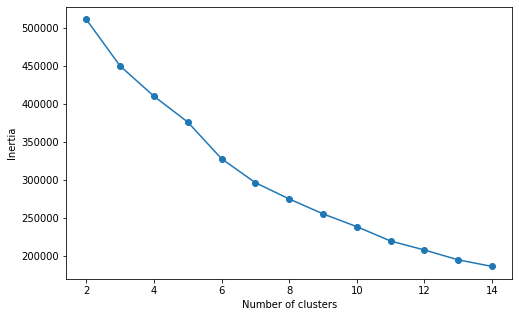

In [29]:
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(data_scaled)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(data_scaled)
    print("Silhouette score for {} clusters k-means : {} ".format(i,silhouette_score(data_scaled,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.324 
Silhouette score for 6 clusters k-means : 0.303 
Silhouette score for 7 clusters k-means : 0.316 
Silhouette score for 8 clusters k-means : 0.309 
Silhouette score for 9 clusters k-means : 0.309 
Silhouette score for 10 clusters k-means : 0.303 


In [31]:
kmeans_labels=KMeans(n_clusters=5,random_state=123).fit_predict(data_scaled)
     

In [32]:
from sklearn.decomposition import PCA

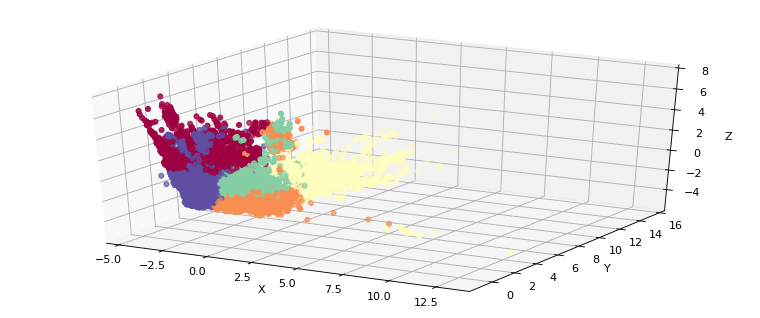

In [33]:
pca = PCA(n_components=3).fit_transform(data_scaled)
fig = plt.figure(figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')
     

In [34]:

fuel_receipts_costs['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(fuel_receipts_costs['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T
     

,4,3,1,0,2
Number of Customers,27634,22765,8857,3205,2604


In [35]:
fuel_receipts_costs

,plant_id_eia,contract_type_code,fuel_group_code,mine_id_pudl,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,Clusters
315779,3,1,1,1038.0,167498.0,21.284,0.55,7.60,0.000,3.978,0.00,0.0,3
315780,3,1,1,1038.0,37259.0,22.634,0.36,7.70,0.000,1.849,0.00,0.0,3
315783,7,1,1,3106.0,8157.0,25.177,1.81,13.20,0.000,3.678,3.91,0.0,3
315786,8,1,1,1038.0,43585.0,21.284,0.55,7.60,0.000,4.345,0.00,0.0,3
315787,8,1,1,4019.0,77250.0,23.948,1.33,12.60,0.000,3.997,0.00,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608335,56564,3,1,20.0,78353.0,18.090,0.22,4.57,0.000,2.290,26.56,0.0,4
608343,56596,1,1,660.0,47191.0,16.160,0.35,5.30,0.093,0.814,31.65,0.0,4
608344,56609,1,1,605.0,200719.0,16.100,0.28,4.70,0.000,0.891,32.29,0.0,4
608372,56786,1,1,633.0,24744.0,12.400,0.63,11.30,0.108,2.695,37.25,0.0,4


In [36]:
means=pd.DataFrame(fuel_receipts_costs.describe().loc['mean'])
means.T.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].round(1)

,plant_id_eia,contract_type_code,fuel_group_code,mine_id_pudl,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
mean,5038.6,1.4,1.0,1298.3,55922.7,20.7,1.3,7.9,0.0,2.3,16.9,43.8


In [37]:
fuel_receipts_costs.set_index('Clusters')
grouped=fuel_receipts_costs.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

,plant_id_eia,contract_type_code,fuel_group_code,mine_id_pudl,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
Clusters,,,,,,,,,,,,
0,5381.6,1.0,1.0,702.2,311767.3,17.3,0.6,9.4,0.0,2.0,23.4,2.5
1,4642.7,3.0,1.0,2412.0,22017.2,23.6,1.6,10.5,0.0,2.6,7.6,7.1
2,3616.6,1.5,1.0,2552.4,33218.2,24.2,2.2,9.5,0.1,2.9,8.9,1026.0
3,4223.0,1.0,1.0,2212.6,38884.4,23.6,2.3,10.0,0.0,2.5,9.0,2.9
4,5931.5,1.3,1.0,139.2,53292.6,17.4,0.3,5.2,0.0,1.9,26.3,1.4


In [38]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

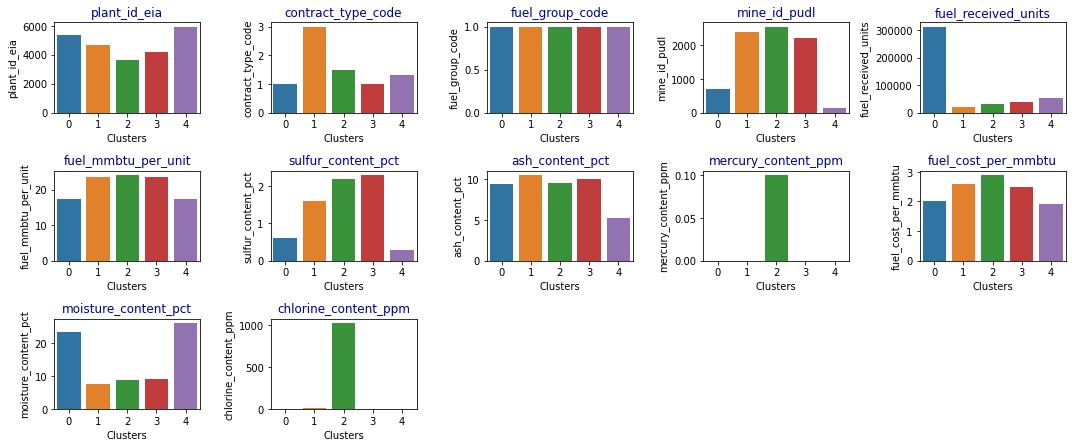

In [39]:
features=['plant_id_eia','contract_type_code','fuel_group_code','mine_id_pudl','fuel_received_units','fuel_mmbtu_per_unit','sulfur_content_pct','ash_content_pct','mercury_content_ppm','fuel_cost_per_mmbtu','moisture_content_pct','chlorine_content_ppm']
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(5,5,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()